In [34]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('kafka_producer_throughput.csv', skipinitialspace=True)

In [4]:
data.head()

,Nodes,Number_of_points,Number_of_partitions,ttc,system
0,2,10000,24,11.459536,stampede
1,2,10000,24,11.420531,stampede
2,2,10000,24,6.108983,stampede
3,2,100000,24,12.122861,stampede
4,2,100000,24,13.160052,stampede


### Stampede 

In [55]:
stampede_data = data[(data.system == 'stampede')]
stampede_data = data[(data.Nodes==1)]
cols = ['Number_of_points','Number_of_partitions','ttc']
stampede_data =  stampede_data[cols]
plot_data = stampede_data.groupby(['Number_of_points','Number_of_partitions']).mean()
plot_std = stampede_data.groupby(['Number_of_points','Number_of_partitions']).std()
plot_data.unstack()

ttc                    
Number_of_partitions        24        48        96
Number_of_points                                  
1000                  0.050630       NaN       NaN
10000                 0.369507       NaN  1.848784
100000                0.389874       NaN       NaN
1000000               0.124013       NaN       NaN
10000000              0.562285       NaN       NaN
100000000                  NaN  3.163702       NaN

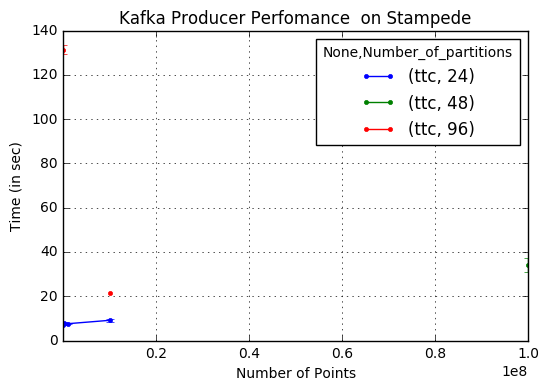

In [60]:
ax = plot_data.unstack().plot(y=['ttc'], 
                      title='Kafka Producer Perfomance  on Stampede', 
                      #legend=None,
                      marker='.',
                      yerr= plot_std.unstack(),
                      #xlim=(0,100000*1000),
                      #xticks = [0,10*1000,100*1000,1000*1000,10000*1000,100000*1000],
                      )
#ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Points")
ax.set_ylabel("Time (in sec)")
#ax.annotate('Spark Download', xy=(2, 1), xytext=(2, 11),)
#ax.annotate('Kafka Download', xy=(2, 1), xytext=(2, 4),)
#ax.annotate('Spark Startup', xy=(2, 1), xytext=(2, 21),)
#ax.annotate('Kafka Startup', xy=(2, 1), xytext=(2, 1), )
ax.grid()
plt.show()
#plt.savefig('rp-streaming_startup.pdf')